In [1]:
!git clone https://github.com/RusinDmitry/Identifying-implicit-relationships-in-abstract-text

Cloning into 'Identifying-implicit-relationships-in-abstract-text'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 82 (delta 43), reused 46 (delta 24), pack-reused 3
Receiving objects: 100% (82/82), 5.79 MiB | 14.38 MiB/s, done.
Resolving deltas: 100% (43/43), done.


## Импортирование данных

In [2]:
import pandas as pd

data = pd.read_csv("/content/Identifying-implicit-relationships-in-abstract-text/table.csv")
data

,Unnamed: 0,Контингент (индификатор),Название проекта (Описание),Дата выхода,Цена,"Производитель, разработчик","Покупатель, заказчик",Участник торгов
0,0,(Контингент: CGN-20230223005),Результаты строительства гидроэлектроэнергии и...,2023-07-24,36270410.0,NaN,"Чайна инжиниринг лимитед , Чайна инжинирин...",NaN
1,1,NaN,Результаты тайфуновой перестройки на заводе MX...,2022-09-16,14010201.0,NaN,Китайская ядерная промышленность 23 строитель...,NaN
2,2,NaN,"BOH, BBX/BBC/BBD/BBY, BCM, BBJ, Проект резолюц...",2023-01-31,106022021.0,NaN,"Китайская ядерная промышленность, Чайна инж...",NaN
3,3,NaN,"Циркуляр результатов, Наблюдение за осуществле...",2022-12-15,97392204.0,NaN,"ООО Чжэцзян , Чайна инжиниринг лимитед",NaN
4,4,(Контингент: CGN-20210615002),В рамках проекта &lt; &lt; Ветроэнергия для бе...,2021-08-03,40818858.0,Hong Kong,Чайна инжиниринг лимитед,Китайская компания по производству новой энергии
...,...,...,...,...,...,...,...,...
1543,1543,"(Контингент: CGN-20230628005), Номер: CGN-2023...","Результаты, Надзор за осуществлением данного т...",2023-08-11,NaN,NaN,Чайна инжиниринг лимитед,Чайна Хиросима
1544,1544,(Контингент: CGN-20220820003),150 МВт наземный ветроэнергетический проект по...,2022-10-18,11564367.0,NaN,", Чайна инжиниринг лимитед",ЧайноЯпонский ветроэнергетик
1545,1545,(Конференция: CGN-20211028003),LF-проект LOT52Ba (переработка вторичной фильт...,2022-07-19,9980000.0,Shanghai Daily Water Technologies,"Чайна инжиниринг лимитед , Чайна инжинирин...",NaN
1546,1546,(Контингент: CGN-20220729003),Надзор за осуществлением данного тендерного пр...,2022-10-18,2587250.0,Hyundai Electric Company,Чайна инжиниринг лимитед,Шанхайская компания Синьхуа


## Распределение цены в зависимости от производителя (топ 15)

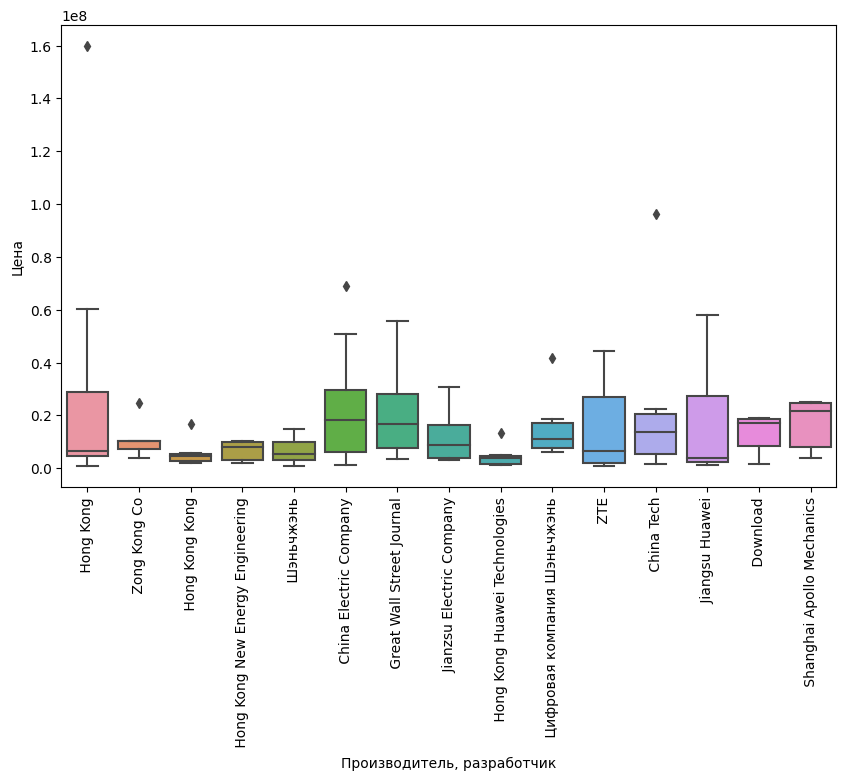

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


data_to_plot = data.loc[:,["Цена", "Производитель, разработчик"]].dropna()
top_categories = data_to_plot['Производитель, разработчик'].value_counts().head(15).index.tolist()
df_top = data_to_plot[data_to_plot['Производитель, разработчик'].isin(top_categories)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Производитель, разработчик', y='Цена', data=df_top, orient='v')
plt.xticks(rotation=90)
plt.show()

## Распределение цены в зависимости от покупателя (топ 25)

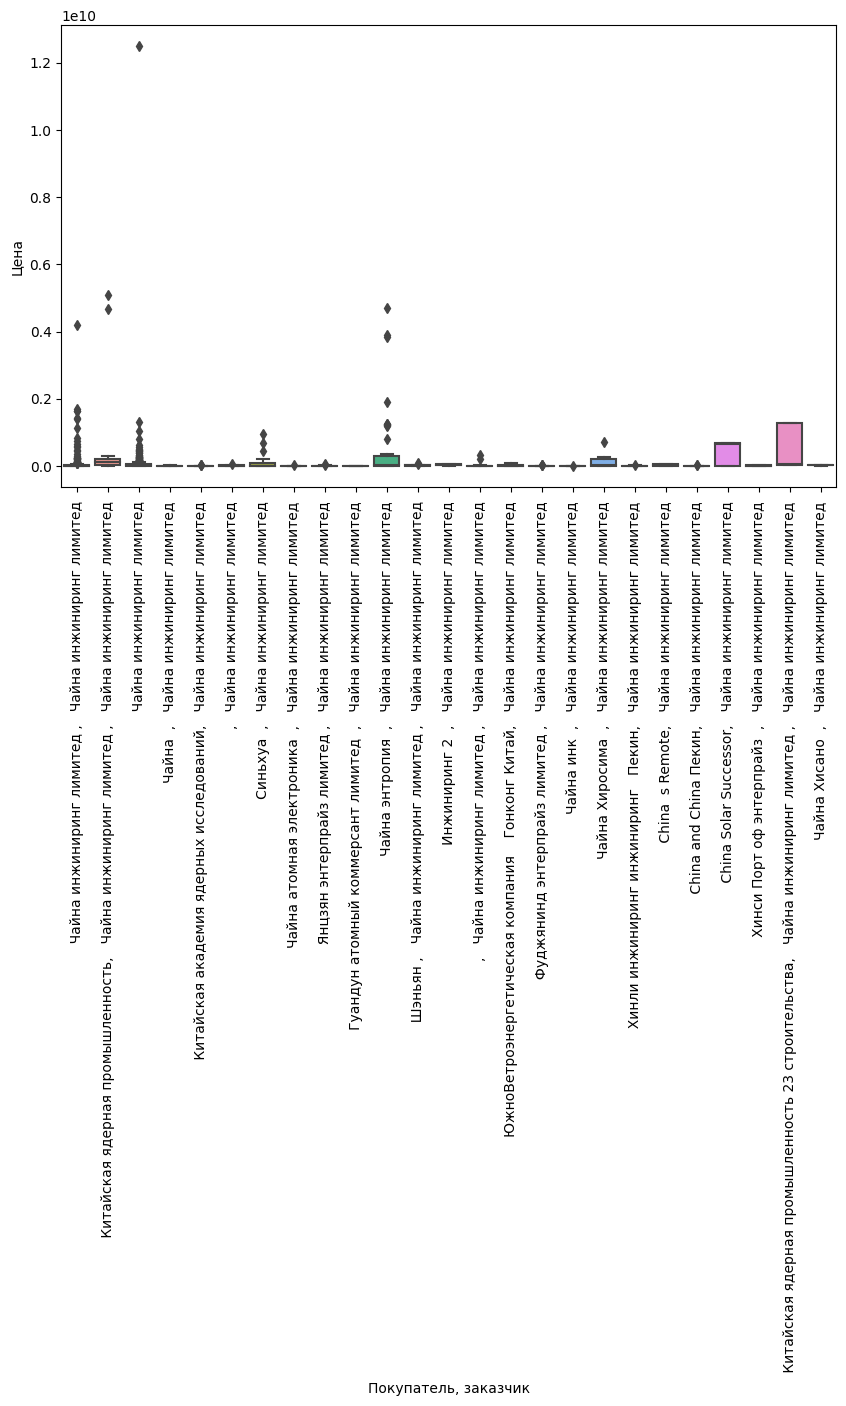

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


data_to_plot = data.loc[:,["Цена", "Покупатель, заказчик"]].dropna()

top_categories = data_to_plot['Покупатель, заказчик'].value_counts().head(25).index.tolist()
df_top = data_to_plot[data_to_plot['Покупатель, заказчик'].isin(top_categories)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Покупатель, заказчик', y='Цена', data=df_top, orient='v')
plt.xticks(rotation=90)
plt.show()

## График дата-цена

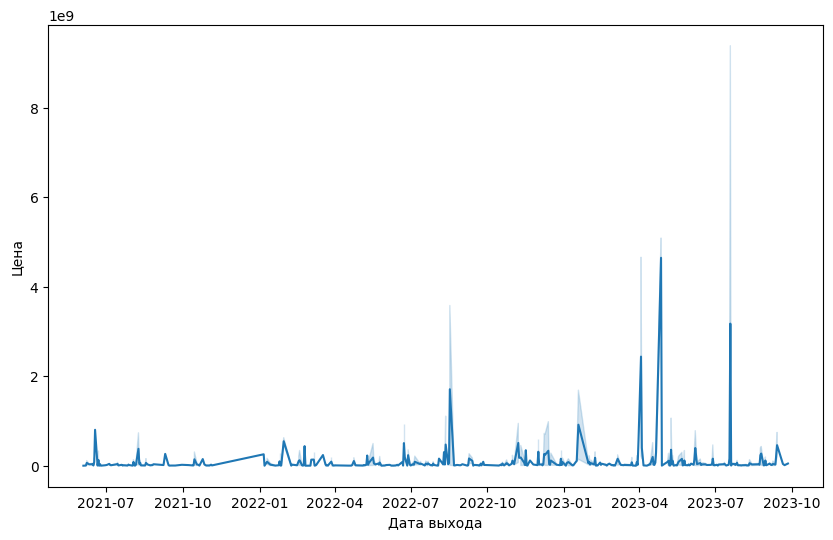

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, у нас есть следующий DataFrame:
data_to_plot = data.loc[:,["Дата выхода", "Цена"]].dropna()

# Преобразуем столбец 'Date' в тип datetime
data_to_plot['Дата выхода'] = pd.to_datetime(data_to_plot['Дата выхода'])

# Для построения графика, мы можем использовать метод lineplot()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Дата выхода', y='Цена', data=data_to_plot)

# Показываем график
plt.show()

## Суммарна стоимость тендеров для разных производителей, разработчиков (топ 25)

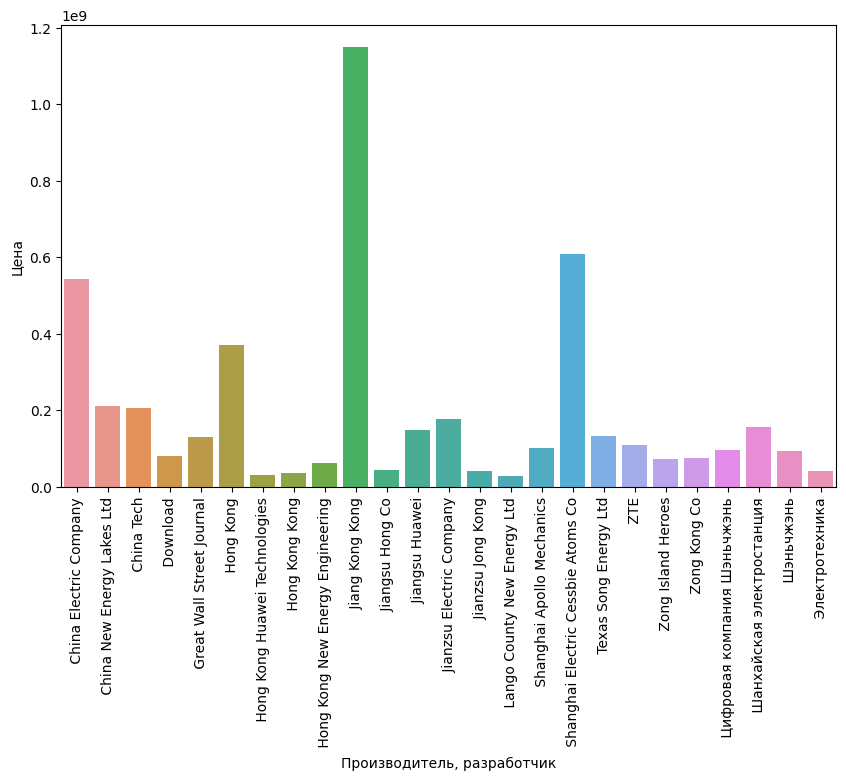

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, у нас есть следующий DataFrame:
data_to_plot = data.loc[:,["Цена", "Производитель, разработчик"]].dropna()

top_categories = data_to_plot['Производитель, разработчик'].value_counts().head(25).index.tolist()
df_top = data_to_plot[data_to_plot['Производитель, разработчик'].isin(top_categories)]
# Группируем данные по категориям и вычисляем сумму для каждой категории
df_grouped = df_top.groupby('Производитель, разработчик').sum()

# Для построения графика, мы можем использовать метод barplot()
plt.figure(figsize=(10, 6))
sns.barplot(x=df_grouped.index, y=df_grouped['Цена'])
plt.xticks(rotation=90)

# Показываем график
plt.show()